# 2D PGA in `galgebra`
Here I'm trying to do some symbolic calculations in 2D PGA using the `galgebra` package.

In [1]:
from sympy import *
from galgebra.ga import Ga
from galgebra.printer import latex
from IPython.display import Math

# tell sympy to use our printing by default
init_printing()

Attempt to generate the algebra for PGA directly:

In [2]:
wxy = (w, x, y) = symbols('w x y', real=True)
pga2 = Ga('e_0 e_1 e_2', g=[0,1, 1], coords=wxy)
grad = pga2.grad

!!!!If I**2 = 0, I cannot be normalized!!!!


In [3]:
# not sure of the best choice here, see docs: 
# https://galgebra.readthedocs.io/en/latest/generated/galgebra.ga.html?galgebra.ga.Ga.dual_mode
pga2.dual_mode(mode='+I')

In [4]:
e0, e1, e2 = pga2.mv()

In [5]:
# define some aliases to simplify writing
e01 = e0*e1; e20=e2*e0; e12=e1*e2; e012=e0*e1*e2

In [6]:
A, B, C, D = symbols("A B C D", real=True)

In [7]:
M = pga2.lt([[A, C, 0],[B,D,0],[0,0,1]]) # generic ray transfer matrix (note the list is the transpose of the matrix)

In [8]:
# helper functions
def point(x, y):
    return x*e20 + y*e01 + e12

def line(a, b, c):
    return a*e1+b*e2+c*e0

In [9]:
# define basic centered rtms

In [10]:
f, d, R = symbols("f d R", real=True) # focal length, distance, radius
n1 ,n2 = symbols("n1 n2", positive=True) # indices of refraction

In [11]:
a, b, c = symbols("a b c", real=True)

In [12]:
M_lens = lambda f: pga2.lt([[1, -1/f, 0],[0,1,0],[0,0,1]])
M_flatref = lambda n1, n2: pga2.lt([[1, 0, 0],[0,n1/n2,0],[0,0,1]])
M_flatmirror = pga2.lt([[1, 0, 0],[0,-1,0],[0,0,1]])
M_sphereref = lambda n1, n2, R: pga2.lt([[1, (n1-n2)/(R*n2), 0],[0,n1/n2,0],[0,0,1]])
M_spheremirror = lambda R: pga2.lt([[1,- 2/R, 0],[0,1,0],[0,0,1]])
M_distance = lambda d: pga2.lt([[1,0,0],[d,1,0],[0,0,1]])

In [13]:
# Euclidean norm
def Euc_norm(p):
    if p.pure_grade() < 0: #not single grade
        return nan
    elif p.pure_grade() == 0:
        return p.get_coefs(0)
    elif p.pure_grade() == 3:
        return 0
    elif p.pure_grade() == 1: # line
        return sqrt(p.get_coefs(1)[1]**2 + p.get_coefs(1)[2]**2)
    elif p.pure_grade() == 2: # point
        return p.get_coefs(2)[2]

In [14]:
# Ideal norm
def Ideal_norm(p):
    if p.pure_grade() < 0: #not single grade
        return nan
    elif p.pure_grade() == 0:
        return 0
    elif p.pure_grade() == 3:
        return p.get_coefs(3)
    elif p.pure_grade() == 1: # line
        return p.get_coefs(1)[0]
    elif p.pure_grade() == 2: # point
        return sqrt(p.get_coefs(2)[0]**2 + p.get_coefs(2)[1]**2)

In [15]:
# Euc_normalize
def Euc_normalize(p):
    n = Euc_norm(p)
    if n==nan:
        return nan
    return p/n

In [16]:
# try composing some rtms together
(M_distance(2*f)*M_lens(f)*M_distance(2*f))(point(-x,y))

y*e_0^e_1 - x*e_0^e_2 - (f + x)*e_1^e_2/f

In [17]:
# define translation and rotation linear operators
M_trans = lambda x,y: pga2.lt(1+y/2*e20-x/2*e01)
M_rot = lambda a, p=e12: pga2.lt(cos(a/2)-sin(a/2)*p) # rotation by angle a about point p

In [107]:
M_rot(a)(point(x,y)).trigsimp()

(x*sin(a) + y*cos(a))*e_0^e_1 + (-x*cos(a) + y*sin(a))*e_0^e_2 + e_1^e_2

In [109]:
M_rot(pi,point(0,-c/b))(line(a,b,c))

-c*e_0 - a*e_1 - b*e_2

In [102]:
simplify(trigsimp(_95.obj))

One gap to close is to match our work with the 3x3 matrix (Siegman or Tovar) and the 4x4 matrix of Shaomin.

In [18]:
M_rot(-f)(M(M_rot(f)(line(a,-1,b))))

(3*A*b*sin(f/2)**8 - 8*A*b*sin(f/2)**6 + 6*A*b*sin(f/2)**4 - 3*A*b*cos(f/2)**8 + 4*A*b*cos(f/2)**6 + B*a*sin(f/2)**8 - 2*B*a*sin(f/2)**6 - B*a*cos(f/2)**8 + 2*B*a*cos(f/2)**6 + 2*B*sin(f/2)**7*cos(f/2) + 6*B*sin(f/2)**5*cos(f/2)**3 + 6*B*sin(f/2)**3*cos(f/2)**5 - 3*B*sin(f)**3/8 + B*sin(f)*cos(f)**3/8 + 3*B*sin(f)*cos(f)/8 + B*sin(f)/2)*e_0 + (-C*b*sin(f/2)**8 - 2*C*b*sin(f/2)**6*cos(f/2)**2 + 2*C*b*sin(f/2)**2*cos(f/2)**6 + C*b*cos(f/2)**8 + D*a*sin(f/2)**8 - 2*D*a*sin(f/2)**4*cos(f/2)**4 + D*a*cos(f/2)**8 + D*(cos(f) + 1)**3*sin(f)/8 - 2*D*sin(f/2)**7*cos(f/2) - 2*D*sin(f/2)**5*cos(f/2)**3 + 2*D*sin(f/2)**3*cos(f/2)**5 + 4*a*sin(f/2)**6*cos(f/2)**2 + 8*a*sin(f/2)**4*cos(f/2)**4 + 4*a*sin(f/2)**2*cos(f/2)**6 - (cos(f) + 1)**3*sin(f)/8 + 2*sin(f/2)**7*cos(f/2) + 2*sin(f/2)**5*cos(f/2)**3 - 2*sin(f/2)**3*cos(f/2)**5)*e_1 + (-C*b*(cos(f) + 1)**3*sin(f)/8 - 2*C*b*sin(f/2)**7*cos(f/2) - 6*C*b*sin(f/2)**5*cos(f/2)**3 - 6*C*b*sin(f/2)**3*cos(f/2)**5 - D*a*(cos(f) + 1)**3*sin(f)/8 + 2*D*a*sin

In [19]:
series(_56.get_coefs(1)[0],f,n=2)

NameError: name '_56' is not defined

In [ ]:
series(_56.get_coefs(1)[1],f,n=2)

In [ ]:
series(_56.get_coefs(1)[2],f,n=2)

In [ ]:
series(-_57/_59,f,n=2).expand().collect([a,b])

In [ ]:
series(-_58/_59,f,n=2).expand().collect([a,b])

In [ ]:
series(-_59/_59,f,n=2).expand().collect([a,b])

In [ ]:
# the above confirms that this agrees with Shaomin up to normalization and linear dependence on the ray parameters.

In [ ]:
M_trans(0,-d)(M(M_trans(0,d)(line(a,-1,b))))

In [ ]:
# This agrees with Shaomin eq. 6 for shifted ABCD matrix!

Tilt-shift example

Show that the object plane, image plane, and focal plane of a thin lens meet at at point

In [20]:
# start with vertical object plane
obj=line(1,0,-d)

In [21]:
obj

-d*e_0 + e_1

In [22]:
img=M_lens(f)(obj)

In [23]:
obj^img # their intersection point is infinitely far away in the y direction.

-d**2*e_0^e_1/f

In [84]:
def J(x):
    # J map for pga2 multivectors
    coef_list = x.blade_coefs()
    # flip sign of e02 and e1
    coef_list[2] = -coef_list[2]
    coef_list[5] = -coef_list[5]
    return pga2.mv(sum(coef_list[7-mm]*flatten(pga2.blades)[mm] for mm in range(8)))

In [85]:
J(J(point(x,y)))

y*e_0^e_1 - x*e_0^e_2 + e_1^e_2

In [86]:
J(J(line(a,b,c)))

c*e_0 + a*e_1 + b*e_2

In [87]:
def vee(A, B):
    # regressive product
    return J(J(A)^J(B))

In [92]:
#now tilt the object plane about where it crosses the axis
obj2=vee(point(-d,0),(sin(a)*e20+cos(a)*e01))

In [93]:
img2 = M_lens(f)(obj2)

In [94]:
img2

-d*cos(a)*e_0 + (d - f)*cos(a)*e_1/f + sin(a)*e_2

In [110]:
obj2^img2

-d**2*cos(a)**2*e_0^e_1/f - d*sin(2*a)*e_1^e_2/(2*f)

In [111]:
lensplane = line(1,0,0) # y axis

In [114]:
lensplane

e_1

In [112]:
obj2^img2^lensplane == 0 # do these all intersect at the same point?

True

In [113]:
Euc_normalize(obj2^img2)

d*e_0^e_1/tan(a) + e_1^e_2

In [ ]:
# This is the point of intersection, x=0, y=the first coefficient

In [117]:
img2^e2

-d*cos(a)*e_0^e_2 + (d - f)*cos(a)*e_1^e_2/f

In [116]:
Euc_normalize(img2^e2)

-d*f*e_0^e_2/(d - f) + e_1^e_2

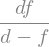

In [120]:
simplify((1/f-1/d)**-1)